<a href="https://colab.research.google.com/github/hakkam10/Fifa_22_database_using_MySQL/blob/main/pwd_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>







---
\




# **PROGRAMMING WITH DATA**




##by
> Mohamed Abdul Hakkam Ansar Ali Khan
---






# Phase A: ER Model

## Task 1

---


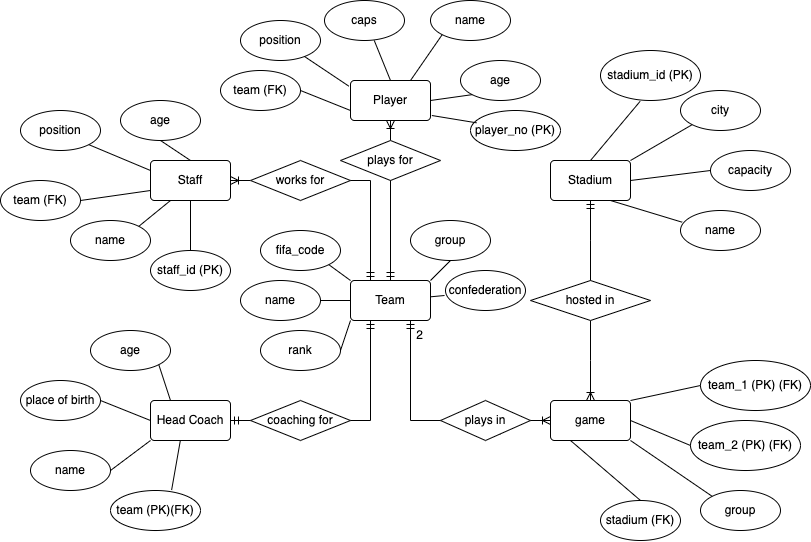

Team is the central part of this model since four other entities share a relationship with team entity. Since, each team only has one head coach manager it is linked to teams with one-to-one relatiionship and team attribute of the head coach manager table is made as a primary key to prevent data with two head coaches in the same team.
This model is designed for group matches and assumes that each team will play against its opponent only one time. Hence the combination of team_1 and team_2 is made as a primary key in order to prevent duplicate entries such as same opponents playing two matches.



---

# Phase B: Database creation
# Task 2
Create the Database
```
mysql> CREATE DATABASE fifa_2022;
Query OK, 1 row affected (0.11 sec)

mysql> USE fifa_2022;
Database changed

```






---


## Table For Teams


```
mysql> CREATE TABLE team(
    -> fifa_code VARCHAR(5),
    -> name VARCHAR(30) NOT NULL,
    -> group_name VARCHAR(1) NOT NULL,
    -> ranking VARCHAR(3),
    -> confederation VARCHAR(15),
    -> PRIMARY KEY (fifa_code),
    -> );
Query OK, 0 rows affected (0.14 sec)

```


```
mysql> DESCRIBE team;
+---------------+-------------+------+-----+---------+-------+
| Field         | Type        | Null | Key | Default | Extra |
+---------------+-------------+------+-----+---------+-------+
| fifa_code     | varchar(5)  | NO   | PRI | NULL    |       |
| name          | varchar(30) | NO   |     | NULL    |       |
| group_name    | varchar(1)  | NO   |     | NULL    |       |
| ranking       | varchar(3)  | YES  |     | NULL    |       |
| confederation | varchar(15) | YES  |     | NULL    |       |
+---------------+-------------+------+-----+---------+-------+
5 rows in set (0.11 sec)

```






---


## Table for Head Coach Manager

```
mysql> CREATE TABLE head_coach(
    -> name VARCHAR(30),
    -> age INT(2),
    -> place_of_birth VARCHAR(30),
    -> team VARCHAR(5) PRIMARY KEY,
    -> CONSTRAINT TEAM_FK FOREIGN KEY (team) REFERENCES team(fifa_code)
    -> );
Query OK, 0 rows affected, 1 warning (0.14 sec)
```

```
mysql> DESCRIBE head_coach;
+----------------+-------------+------+-----+---------+-------+
| Field          | Type        | Null | Key | Default | Extra |
+----------------+-------------+------+-----+---------+-------+
| name           | varchar(30) | YES  |     | NULL    |       |
| age            | int         | YES  |     | NULL    |       |
| place_of_birth | varchar(30) | YES  |     | NULL    |       |
| team           | varchar(5)  | NO   | PRI | NULL    |       |
+----------------+-------------+------+-----+---------+-------+
4 rows in set (0.11 sec)

```





---


## Table For Staff

```
mysql> CREATE TABLE staff(
    -> staff_id VARCHAR(30),
    -> name VARCHAR(30) NOT NULL,
    -> age INT(2) NOT NULL,
    -> team VARCHAR(5) NOT NULL,
    -> position VARCHAR(30),
    -> PRIMARY KEY (staff_id),
    -> FOREIGN KEY (team) REFERENCES team(fifa_code)
    -> );
Query OK, 0 rows affected, 1 warning (0.15 sec)
```
```
mysql> DESCRIBE staff;
+----------+-------------+------+-----+---------+-------+
| Field    | Type        | Null | Key | Default | Extra |
+----------+-------------+------+-----+---------+-------+
| staff_id | varchar(30) | NO   | PRI | NULL    |       |
| name     | varchar(30) | NO   |     | NULL    |       |
| age      | int         | NO   |     | NULL    |       |
| team     | varchar(5)  | NO   | MUL | NULL    |       |
| position | varchar(30) | YES  |     | NULL    |       |
+----------+-------------+------+-----+---------+-------+
5 rows in set (0.10 sec)
```



---


## Table For Players

```
mysql> CREATE TABLE player(
    -> player_no VARCHAR(10),
    -> name VARCHAR(30) NOT NULL,
    -> age INT(2) NOT NULL,
    -> caps INT(4),
    -> position VARCHAR(30),
    -> team VARCHAR(5) NOT NULL,
    -> PRIMARY KEY (player_no),
    -> FOREIGN KEY (team) REFERENCES team(fifa_code)
    -> );
Query OK, 0 rows affected, 2 warnings (0.14 sec)
```

```
mysql> describe player;
+-----------+-------------+------+-----+---------+-------+
| Field     | Type        | Null | Key | Default | Extra |
+-----------+-------------+------+-----+---------+-------+
| player_no | varchar(10) | NO   | PRI | NULL    |       |
| name      | varchar(30) | NO   |     | NULL    |       |
| age       | int         | NO   |     | NULL    |       |
| caps      | int         | YES  |     | NULL    |       |
| position  | varchar(30) | YES  |     | NULL    |       |
| team      | varchar(5)  | NO   | MUL | NULL    |       |
+-----------+-------------+------+-----+---------+-------+
6 rows in set (0.11 sec)

```



---


## Table For Stadiums

```
`mysql> CREATE TABLE stadium(
    -> stadium_id VARCHAR(30),
    -> name VARCHAR(50) NOT NULL,
    -> city VARCHAR(30) NOT NULL,
    -> capacity INT(10),
    -> PRIMARY KEY (stadium_id)
    -> );
Query OK, 0 rows affected, 1 warning (0.14 sec)
```

```
mysql> DESCRIBE stadium;
+------------+-------------+------+-----+---------+-------+
| Field      | Type        | Null | Key | Default | Extra |
+------------+-------------+------+-----+---------+-------+
| stadium_id | varchar(30) | NO   | PRI | NULL    |       |
| name       | varchar(50) | NO   |     | NULL    |       |
| city       | varchar(30) | NO   |     | NULL    |       |
| capacity   | int         | YES  |     | NULL    |       |
+------------+-------------+------+-----+---------+-------+
4 rows in set (0.11 sec)

```



---


## Table for Games

```
mysql> CREATE TABLE game(
    -> team_1 VARCHAR(3),
    -> team_2 VARCHAR(3),
    -> date DATE NOT NULL,
    -> stadium_id VARCHAR(3),
    -> group_name VARCHAR(1) NOT NULL,
    -> FOREIGN KEY (team_1) REFERENCES team(fifa_code),
    -> FOREIGN KEY (team_2) REFERENCES team(fifa_code),
    -> FOREIGN KEY (stadium_id) REFERENCES stadium(stadium_id),
    -> PRIMARY KEY (team_1,team_2),
    -> CONSTRAINT team_not_same CHECK (team_1 <> team_2))
    -> ;
Query OK, 0 rows affected (0.15 sec)
```
Team not same constraint is implemented to prevent entry of a team playing against itself.
```
mysql> DESCRIBE game;
+------------+------------+------+-----+---------+-------+
| Field      | Type       | Null | Key | Default | Extra |
+------------+------------+------+-----+---------+-------+
| team_1     | varchar(3) | NO   | PRI | NULL    |       |
| team_2     | varchar(3) | NO   | PRI | NULL    |       |
| date       | date       | NO   |     | NULL    |       |
| stadium_id | varchar(3) | YES  | MUL | NULL    |       |
| group_name | varchar(1) | NO   |     | NULL    |       |
+------------+------------+------+-----+---------+-------+
5 rows in set (0.10 sec)

```



---


# Task 3 - Data Insertion
To make the report concise and for easy readability I have skipped some data inbetween. The whole SQL scripts are provided in the appendix.
## Table - team
```
mysql> INSERT INTO
    -> team
    -> VALUES
    -> ('NED','Netherlands','A','8','UEFA'),
    -> ('ECU','Ecuador','A','44','CONMEBOL'),
    -> ('QAT','Qatar','A','50','AFC'),
    -> ('SEN','Senegal','A','18','CAF'),
      ...
      ...
      ...
    -> ('TUN','Tunisia','D','30','CAF')
    -> ;
Query OK, 16 rows affected (0.12 sec)
Records: 16  Duplicates: 0  Warnings: 0
```


## Table - head_coach
```
mysql> INSERT INTO
    -> head_coach
    -> VALUES
    -> ('Gustavo Alfaro','60','Argentina','ECU'),
    -> ('Louis van Gaal','71','Netherlands','NED'),
    -> ('Félix Sánchez','46', 'Spain', 'QAT'),
    -> ('Aliou Cissé','46', 'Senegal', 'SEN'),
      ...
      ...
      ...
    -> ('Jalel Kadri','50', 'Tunisia', 'TUN')
    -> ;
Query OK, 16 rows affected (0.12 sec)
Records: 16  Duplicates: 0  Warnings: 0
 ```

##Table - Staff

```
Mysql> INSERT INTO
    -> staff
    -> VALUES
    ->('ECUS1', 'Claudio Cristofanelli', '72', 'ECU', 'Assistant coach'),
    ->('ECUS2', 'Carlos González', '66', 'ECU', 'Assistant coach'),
    ->('ECUS3', 'Nicolás Chiesa', '68', 'ECU', 'Assistant coach'),
    ->('ECUS4', 'Diego Carranza', '49', 'ECU', 'Goalkeeping coach'),
      ...
      ...
      ...
    ->('TUNS10', 'Majdi Turki', '63', 'TUN', 'Physiotherapists');
Query OK, 112 rows affected (0.15 sec)
Records: 112  Duplicates: 0  Warnings: 0

```

## Table - player
```
Mysql> INSERT INTO
    -> head_coach
    -> VALUES
    ->('ECUS1', 'Claudio Cristofanelli', '72', 'ECU', 'Assistant coach'),
    ->('ECUS2', 'Carlos González', '66', 'ECU', 'Assistant coach'),
    ->('ECUS3', 'Nicolás Chiesa', '68', 'ECU', 'Assistant coach'),
    ->('ECUS4', 'Diego Carranza', '49', 'ECU', 'Goalkeeping coach'),
      ...
      ...
      ...
    ->('TUNS10', 'Majdi Turki', '63', 'TUN', 'Physiotherapists');
Query OK, 112 rows affected (0.15 sec)
Records: 112  Duplicates: 0  Warnings: 0
```


## Table - stadium

```
mysql> INSERT INTO stadium VALUES
    ->  ('LIS', 'Lusail Iconic Stadium', 'Lusail', '88966'),
    ->  ('ABS', 'Al Bayt Stadium', 'Al Khor', '68895'),
    ->  ('ATS', 'Al Thumama Stadium', 'Doha', '44400'),
    ->  ('RAS', 'Ras Abu Aboud Stadium', 'Doha', '44089'),
    ->  ('KIS', 'Khalifa International Stadium', 'Al Rayyan', '45032'),
    ->  ('BAS', 'Ahmad bin Ali Stadium', 'Al Rayyan', '45032'),
    ->  ('ECS', 'Education City Stadium', 'Al Rayyan', '44667'),
    ->  ('AJS', 'Al Janoub Stadium', 'Al Wakrah', '44325');
Query OK, 8 rows affected (0.11 sec)
Records: 8  Duplicates: 0  Warnings: 0
```

## Table - game
```
mysql> INSERT INTO game
    -> VALUES
    -> ('QAT', 'ECU', '2022-11-20', 'ABS', 'A'),
    -> ('SEN', 'NED', '2022-11-21', 'ATS', 'A'),
    -> ('QAT', 'SEN', '2022-11-25', 'ATS', 'A'),
    -> ('NED', 'ECU', '2022-11-25', 'KIS', 'A'),
      ...
      ...
      ...
    -> ('TUN', 'FRA', '2022-11-30', 'ECS', 'D');
Query OK, 24 rows affected (0.12 sec)
Records: 24  Duplicates: 0  Warnings: 0
```



---


# Phase C: Querying the database

##Task 4

### 4.1 Export data about football players.

Query to select all players.

```
mysql> SELECT * FROM player;
+-----------+---------------------+-----+------+----------+------+
| player_no | name                | age | caps | position | team |
+-----------+---------------------+-----+------+----------+------+
| ARG1      | Franco Armani       |  36 |   18 | GK       | ARG  |
| ARG2      | Juan Foyth          |  24 |   16 | DF       | ARG  |
| ARG3      | Nicolás Tagliafico  |  30 |   42 | DF       | ARG  |
| ARG4      | Gonzalo Montiel     |  25 |   18 | DF       | ARG  |
| ARG5      | Leandro Paredes     |  28 |   46 | MF       | ARG  |
| ARG6      | Germán Pezzella     |  31 |   32 | DF       | ARG  |
| ARG7      | Rodrigo De          |  28 |   44 | MF       | ARG  |
| AUS1      | Mathew Ryan         |  30 |   75 | GK       | AUS  |
| AUS2      | Miloš Degenek       |  28 |   38 | DF       | AUS  |
| AUS3      | Nathaniel Atkinson  |  23 |    5 | DF       | AUS  |
| AUS4      | Kye Rowles          |  24 |    3 | DF       | AUS  |
| AUS5      | Fran Karačić        |  26 |   11 | DF       | AUS  |
| AUS6      | Marco Tilio         |  21 |    5 | FW       | AUS  |
| AUS7      | Mathew Leckie       |  31 |   73 | FW       | AUS  |
| DEN1      | Kasper Schmeichel   |  36 |   86 | GK       | DEN  |
| DEN2      | Joachim Andersen    |  26 |   19 | DF       | DEN  |
| DEN3      | Victor Nelsson      |  24 |    7 | DF       | DEN  |
| DEN4      | Simon Kjær          |  33 |  121 | DF       | DEN  |
| DEN5      | Joakim Mæhle        |  25 |   31 | DF       | DEN  |
| DEN6      | Andreas Christensen |  26 |   58 | DF       | DEN  |
| DEN7      | Mathias Jensen      |  26 |   20 | MF       | DEN  |
| ECU1      | Hernán Galíndez     |  35 |   12 | GK       | ECU  |
| ECU2      | Félix Torres        |  25 |   17 | DF       | ECU  |
| ECU3      | Piero Hincapié      |  20 |   21 | DF       | ECU  |
| ECU4      | Robert Arboleda     |  31 |   33 | DF       | ECU  |
| ECU5      | José Cifuentes      |  23 |   11 | MF       | ECU  |
| ECU6      | William Pacho       |  21 |    0 | DF       | ECU  |
| ECU7      | Pervis Estupiñán    |  24 |   28 | DF       | ECU  |
| ENG1      | Jordan Pickford     |  28 |   45 | GK       | ENG  |
| ENG2      | Kyle Walker         |  32 |   70 | DF       | ENG  |
| ENG3      | Luke Shaw           |  27 |   23 | DF       | ENG  |
| ENG4      | Declan Rice         |  23 |   34 | MF       | ENG  |
| ENG5      | John Stones         |  28 |   59 | DF       | ENG  |
| ENG6      | Harry Maguire       |  29 |   48 | DF       | ENG  |
| ENG7      | Jack Grealish       |  27 |   24 | FW       | ENG  |
| IRN1      | Alireza Beiranvand  |  30 |   52 | GK       | IRN  |
| IRN2      | Sadegh Moharrami    |  26 |   21 | DF       | IRN  |
| IRN3      | Ehsan Hajsafi       |  32 |  121 | DF       | IRN  |
| IRN4      | Shojae Khalilzadeh  |  33 |   25 | DF       | IRN  |
| IRN5      | Milad Mohammadi     |  29 |   45 | DF       | IRN  |
| IRN6      | Saeid Ezatolahi     |  26 |   47 | MF       | IRN  |
| IRN7      | Alireza Jahanbakhsh |  29 |   64 | MF       | IRN  |
| MEX1      | Alfredo Talavera    |  40 |   40 | GK       | MEX  |
| MEX2      | Néstor Araujo       |  31 |   63 | DF       | MEX  |
| MEX3      | César Montes        |  25 |   30 | DF       | MEX  |
| MEX4      | Edson Álvarez       |  25 |   58 | DF       | MEX  |
| MEX5      | Johan Vásquez       |  24 |    7 | DF       | MEX  |
| MEX6      | Gerardo Arteaga     |  24 |   17 | DF       | MEX  |
| MEX7      | Luis Romo           |  27 |   27 | MF       | MEX  |
| NED1      | Remko Pasveer       |  39 |    2 | GK       | NED  |
| NED2      | Jurriën Timber      |  21 |   10 | DF       | NED  |
| NED3      | Matthijs de Ligt    |  23 |   38 | DF       | NED  |
| NED4      | Virgil van Dijk     |  31 |   49 | DF       | NED  |
| NED5      | Nathan Aké          |  27 |   29 | DF       | NED  |
| NED6      | Stefan de Vrij      |  30 |   59 | DF       | NED  |
| NED7      | Steven Bergwijn     |  25 |   24 | FW       | NED  |
| POL1      | Wojciech Szczęsny   |  32 |   66 | GK       | POL  |
| POL2      | Matty Cash          |  25 |    7 | DF       | POL  |
| POL3      | Artur Jędrzejczyk   |  35 |   40 | DF       | POL  |
| POL4      | Mateusz Wieteska    |  25 |    2 | DF       | POL  |
| POL5      | Jan Bednarek        |  26 |   45 | DF       | POL  |
| POL6      | Krystian Bielik     |  24 |    5 | MF       | POL  |
| POL7      | Arkadiusz Milik     |  28 |   64 | FW       | POL  |
| QAT1      | Saad Al-Sheeb       |  32 |   76 | GK       | QAT  |
| QAT2      | Ró-Ró               |  32 |   80 | DF       | QAT  |
| QAT3      | Abdelkarim Hassan   |  29 |  130 | MF       | QAT  |
| QAT4      | Mohammed Waad       |  23 |   21 | DF       | QAT  |
| QAT5      | Tarek Salman        |  24 |   58 | DF       | QAT  |
| QAT6      | Abdulaziz Hatem     |  32 |  107 | MF       | QAT  |
| QAT7      | Ahmed Alaaeldin     |  29 |   47 | FW       | QAT  |
| SEN1      | Seny Dieng          |  27 |    4 | GK       | SEN  |
| SEN2      | Formose Mendy       |  21 |    2 | DF       | SEN  |
| SEN3      | Kalidou Koulibaly   |  31 |   64 | DF       | SEN  |
| SEN4      | Pape Abou Cissé     |  27 |   13 | DF       | SEN  |
| SEN5      | Idrissa Gueye       |  33 |   96 | MF       | SEN  |
| SEN6      | Nampalys Mendy      |  30 |   19 | MF       | SEN  |
| SEN7      | Nicolas Jackson     |  21 |    0 | FW       | SEN  |
| TUN1      | Aymen Mathlouthi    |  38 |   73 | GK       | TUN  |
| TUN2      | Bilel Ifa           |  32 |   37 | DF       | TUN  |
| TUN3      | Montassar Talbi     |  24 |   23 | DF       | TUN  |
| TUN4      | Yassine Meriah      |  29 |   61 | DF       | TUN  |
| TUN5      | Nader Ghandri       |  27 |    8 | MF       | TUN  |
| TUN6      | Dylan Bronn         |  27 |   36 | DF       | TUN  |
| TUN7      | Youssef Msakni      |  32 |   88 | FW       | TUN  |
| USA1      | Matt Turner         |  28 |   20 | GK       | USA  |
| USA2      | Sergiño Dest        |  22 |   19 | DF       | USA  |
| USA3      | Walker Zimmerman    |  29 |   33 | DF       | USA  |
| USA4      | Tyler Adams         |  23 |   32 | MF       | USA  |
| USA5      | Antonee Robinson    |  25 |   29 | DF       | USA  |
| USA6      | Yunus Musah         |  19 |   19 | MF       | USA  |
| USA7      | Giovanni Reyna      |  20 |   14 | FW       | USA  |
| WAL1      | Wayne Hennessey     |  35 |  106 | GK       | WAL  |
| WAL2      | Chris Gunter        |  33 |  109 | DF       | WAL  |
| WAL3      | Neco Williams       |  21 |   23 | DF       | WAL  |
| WAL4      | Ben Davies          |  29 |   74 | DF       | WAL  |
| WAL5      | Chris Mepham        |  25 |   33 | DF       | WAL  |
| WAL6      | Joe Rodon           |  25 |   30 | DF       | WAL  |
| WAL7      | Joe Allen           |  32 |   72 | MF       | WAL  |
+-----------+---------------------+-----+------+----------+------+
98 rows in set (0.11 sec)
```



---


###4.2 Export data about head coach managers and their associated teams.
Query to select head coach managers and their associated teams.

```
mysql> SELECT t.name AS team, hc.name AS head_coach_manager, hc.age, hc.place_of_birth
    -> FROM head_coach AS hc, team AS t
    -> WHERE t.fifa_code = hc.team;
+---------------+----------------------+------+--------------------------+
| team          | head_coach_manager   | age  | place_of_birth           |
+---------------+----------------------+------+--------------------------+
| Argentina     | Lionel Scaloni       |   44 | Argentina                |
| Australia     | Graham Arnold        |   59 | Australia                |
| Denmark       | Kasper Hjulmand      |   50 | Denmark                  |
| Ecuador       | Gustavo Alfaro       |   60 | Argentina                |
| England       | Gareth Southgate     |   52 | England                  |
| France        | Didier Deschamps     |   54 | France                   |
| Iran          | Carlos Queiroz       |   69 | Portuguese Mozambique    |
| Saudi Arabia  | Hervé Renard         |   54 | France                   |
| Mexico        | Gerardo Martino      |   60 | Argentina                |
| Netherlands   | Louis van Gaal       |   71 | Netherlands              |
| Poland        | Czesław Michniewicz  |   52 | Soviet Union             |
| Qatar         | Félix Sánchez        |   46 | Spain                    |
| Senegal       | Aliou Cissé          |   46 | Senegal                  |
| Tunisia       | Jalel Kadri          |   50 | Tunisia                  |
| United States | Gregg Berhalter      |   49 | United States of America |
| Wales         | Rob Page             |   48 | Wales                    |
+---------------+----------------------+------+--------------------------+
16 rows in set (0.11 sec)
```



---


###4.3 Export data to show the group of each team.
Query to select group of each team
```
mysql> SELECT team.fifa_code, team.name AS team, team.group_name
    -> FROM team
    -> ORDER BY group_name;
+-----------+---------------+------------+
| fifa_code | team          | group_name |
+-----------+---------------+------------+
| ECU       | Ecuador       | A          |
| NED       | Netherlands   | A          |
| QAT       | Qatar         | A          |
| SEN       | Senegal       | A          |
| ENG       | England       | B          |
| IRN       | Iran          | B          |
| USA       | United States | B          |
| WAL       | Wales         | B          |
| ARG       | Argentina     | C          |
| KSA       | Saudi Arabia  | C          |
| MEX       | Mexico        | C          |
| POL       | Poland        | C          |
| AUS       | Australia     | D          |
| DEN       | Denmark       | D          |
| FRA       | France        | D          |
| TUN       | Tunisia       | D          |
+-----------+---------------+------------+
16 rows in set (0.11 sec)

```



---


### 4.4 Export data to show the football stadium for each team game.
Query to select the football stadiums for each team game.
```
mysql> SELECT game.team_1, game.team_2, game.group_name, game.date, stadium.name AS stadium
    -> FROM game, stadium
    -> WHERE stadium.stadium_id = game.stadium_id
    -> ORDER BY game.date;
+--------+--------+------------+------------+-------------------------------+
| team_1 | team_2 | group_name | date       | stadium                       |
+--------+--------+------------+------------+-------------------------------+
| QAT    | ECU    | A          | 2022-11-20 | Al Bayt Stadium               |
| SEN    | NED    | A          | 2022-11-21 | Al Thumama Stadium            |
| USA    | WAL    | B          | 2022-11-21 | Ahmad bin Ali Stadium         |
| ENG    | IRN    | B          | 2022-11-21 | Khalifa International Stadium |
| FRA    | AUS    | D          | 2022-11-22 | Al Janoub Stadium             |
| DEN    | TUN    | D          | 2022-11-22 | Education City Stadium        |
| ARG    | KSA    | C          | 2022-11-22 | Lusail Iconic Stadium         |
| MEX    | POL    | C          | 2022-11-22 | Ras Abu Aboud Stadium         |
| ENG    | USA    | B          | 2022-11-25 | Al Bayt Stadium               |
| QAT    | SEN    | A          | 2022-11-25 | Al Thumama Stadium            |
| WAL    | IRN    | B          | 2022-11-25 | Ahmad bin Ali Stadium         |
| NED    | ECU    | A          | 2022-11-25 | Khalifa International Stadium |
| TUN    | AUS    | D          | 2022-11-26 | Al Janoub Stadium             |
| POL    | KSA    | C          | 2022-11-26 | Education City Stadium        |
| ARG    | MEX    | C          | 2022-11-26 | Lusail Iconic Stadium         |
| FRA    | DEN    | D          | 2022-11-26 | Ras Abu Aboud Stadium         |
| NED    | QAT    | A          | 2022-11-29 | Al Bayt Stadium               |
| IRN    | USA    | B          | 2022-11-29 | Al Thumama Stadium            |
| WAL    | ENG    | B          | 2022-11-29 | Ahmad bin Ali Stadium         |
| ECU    | SEN    | A          | 2022-11-29 | Khalifa International Stadium |
| AUS    | DEN    | D          | 2022-11-30 | Al Janoub Stadium             |
| TUN    | FRA    | D          | 2022-11-30 | Education City Stadium        |
| KSA    | MEX    | C          | 2022-11-30 | Lusail Iconic Stadium         |
| POL    | ARG    | C          | 2022-11-30 | Ras Abu Aboud Stadium         |
+--------+--------+------------+------------+-------------------------------+
24 rows in set (0.11 sec)
```



---


### 4.5 Export data to count how many staff members are in the database per team.
Use the ```GROUP BY``` function to group staff members by team and then use the ```COUNT()``` function to count the number of staff members.

```
mysql> SELECT team.name AS team, COUNT(staff.staff_id) AS staff_members
    -> FROM team, staff
    -> WHERE staff.team = team.fifa_code
    -> GROUP BY team.name;
+---------------+---------------+
| team          | staff_members |
+---------------+---------------+
| Argentina     |             6 |
| Australia     |             8 |
| Denmark       |             7 |
| Ecuador       |             5 |
| England       |             7 |
| France        |             8 |
| Iran          |             9 |
| Saudi Arabia  |             5 |
| Mexico        |             6 |
| Netherlands   |             8 |
| Poland        |            11 |
| Qatar         |             6 |
| Senegal       |             6 |
| Tunisia       |            10 |
| United States |             4 |
| Wales         |             6 |
+---------------+---------------+
16 rows in set (0.11 sec)

```



---


###4.6 Export data to find the teams that start with "Eng".
query to select the teams that start with the letters "Eng".
```
mysql> SELECT * FROM team
    -> WHERE team.name LIKE "eng%";
+-----------+---------+------------+---------+-------------+
| fifa_code | name    | group_name | ranking | association |
+-----------+---------+------------+---------+-------------+
| ENG       | England | B          | 5       | UEFA        |
+-----------+---------+------------+---------+-------------+
1 row in set (0.11 sec)
```



---


###4.7 Export data to find the staff members per head coach.
Query to view the number of staffs per head_coach.
```
mysql> SELECT head_coach.name, COUNT(staff.staff_id) AS staff_members
    -> FROM head_coach, staff
    -> WHERE head_coach.team = staff.team
    -> GROUP BY head_coach.name;
+----------------------+---------------+
| name                 | staff_members |
+----------------------+---------------+
| Lionel Scaloni       |             6 |
| Graham Arnold        |             8 |
| Kasper Hjulmand      |             7 |
| Gustavo Alfaro       |             5 |
| Gareth Southgate     |             7 |
| Didier Deschamps     |             8 |
| Carlos Queiroz       |             9 |
| Hervé Renard         |             5 |
| Gerardo Martino      |             6 |
| Louis van Gaal       |             8 |
| Czesław Michniewicz  |            11 |
| Félix Sánchez        |             6 |
| Aliou Cissé          |             6 |
| Jalel Kadri          |            10 |
| Gregg Berhalter      |             4 |
| Rob Page             |             6 |
+----------------------+---------------+
16 rows in set (0.10 sec)
```



---


###4.8 Export data to find the youngest manager.
Use the MIN function to select the minimum number in the age column.
```
mysql> SELECT * FROM head_coach  
    -> WHERE age = (SELECT MIN(age) FROM head_coach);                                                                                          
+----------------+------+----------------+------+
| name           | age  | place_of_birth | team |
+----------------+------+----------------+------+
| Lionel Scaloni |   44 | Argentina      | ARG  |
+----------------+------+----------------+------+
1 row in set (0.11 sec)
```



---


###4.9 Export data to find players between 22-30 years old (including 22 and 30).
Query to select Players between the age of 22 and 30
```
mysql> SELECT * FROM player
    -> WHERE age BETWEEN 22 AND 30;
+-----------+---------------------+-----+------+----------+------+
| player_no | name                | age | caps | position | team |
+-----------+---------------------+-----+------+----------+------+
| ARG2      | Juan Foyth          |  24 |   16 | DF       | ARG  |
| ARG3      | Nicolás Tagliafico  |  30 |   42 | DF       | ARG  |
| ARG4      | Gonzalo Montiel     |  25 |   18 | DF       | ARG  |
| ARG5      | Leandro Paredes     |  28 |   46 | MF       | ARG  |
| ARG7      | Rodrigo De          |  28 |   44 | MF       | ARG  |
| AUS1      | Mathew Ryan         |  30 |   75 | GK       | AUS  |
| AUS2      | Miloš Degenek       |  28 |   38 | DF       | AUS  |
| AUS3      | Nathaniel Atkinson  |  23 |    5 | DF       | AUS  |
| AUS4      | Kye Rowles          |  24 |    3 | DF       | AUS  |
| AUS5      | Fran Karačić        |  26 |   11 | DF       | AUS  |
| DEN2      | Joachim Andersen    |  26 |   19 | DF       | DEN  |
| DEN3      | Victor Nelsson      |  24 |    7 | DF       | DEN  |
| DEN5      | Joakim Mæhle        |  25 |   31 | DF       | DEN  |
| DEN6      | Andreas Christensen |  26 |   58 | DF       | DEN  |
| DEN7      | Mathias Jensen      |  26 |   20 | MF       | DEN  |
| ECU2      | Félix Torres        |  25 |   17 | DF       | ECU  |
| ECU5      | José Cifuentes      |  23 |   11 | MF       | ECU  |
| ECU7      | Pervis Estupiñán    |  24 |   28 | DF       | ECU  |
| ENG1      | Jordan Pickford     |  28 |   45 | GK       | ENG  |
| ENG3      | Luke Shaw           |  27 |   23 | DF       | ENG  |
| ENG4      | Declan Rice         |  23 |   34 | MF       | ENG  |
| ENG5      | John Stones         |  28 |   59 | DF       | ENG  |
| ENG6      | Harry Maguire       |  29 |   48 | DF       | ENG  |
| ENG7      | Jack Grealish       |  27 |   24 | FW       | ENG  |
| IRN1      | Alireza Beiranvand  |  30 |   52 | GK       | IRN  |
| IRN2      | Sadegh Moharrami    |  26 |   21 | DF       | IRN  |
| IRN5      | Milad Mohammadi     |  29 |   45 | DF       | IRN  |
| IRN6      | Saeid Ezatolahi     |  26 |   47 | MF       | IRN  |
| IRN7      | Alireza Jahanbakhsh |  29 |   64 | MF       | IRN  |
| MEX3      | César Montes        |  25 |   30 | DF       | MEX  |
| MEX4      | Edson Álvarez       |  25 |   58 | DF       | MEX  |
| MEX5      | Johan Vásquez       |  24 |    7 | DF       | MEX  |
| MEX6      | Gerardo Arteaga     |  24 |   17 | DF       | MEX  |
| MEX7      | Luis Romo           |  27 |   27 | MF       | MEX  |
| NED3      | Matthijs de Ligt    |  23 |   38 | DF       | NED  |
| NED5      | Nathan Aké          |  27 |   29 | DF       | NED  |
| NED6      | Stefan de Vrij      |  30 |   59 | DF       | NED  |
| NED7      | Steven Bergwijn     |  25 |   24 | FW       | NED  |
| POL2      | Matty Cash          |  25 |    7 | DF       | POL  |
| POL4      | Mateusz Wieteska    |  25 |    2 | DF       | POL  |
| POL5      | Jan Bednarek        |  26 |   45 | DF       | POL  |
| POL6      | Krystian Bielik     |  24 |    5 | MF       | POL  |
| POL7      | Arkadiusz Milik     |  28 |   64 | FW       | POL  |
| QAT3      | Abdelkarim Hassan   |  29 |  130 | MF       | QAT  |
| QAT4      | Mohammed Waad       |  23 |   21 | DF       | QAT  |
| QAT5      | Tarek Salman        |  24 |   58 | DF       | QAT  |
| QAT7      | Ahmed Alaaeldin     |  29 |   47 | FW       | QAT  |
| SEN1      | Seny Dieng          |  27 |    4 | GK       | SEN  |
| SEN4      | Pape Abou Cissé     |  27 |   13 | DF       | SEN  |
| SEN6      | Nampalys Mendy      |  30 |   19 | MF       | SEN  |
| TUN3      | Montassar Talbi     |  24 |   23 | DF       | TUN  |
| TUN4      | Yassine Meriah      |  29 |   61 | DF       | TUN  |
| TUN5      | Nader Ghandri       |  27 |    8 | MF       | TUN  |
| TUN6      | Dylan Bronn         |  27 |   36 | DF       | TUN  |
| USA1      | Matt Turner         |  28 |   20 | GK       | USA  |
| USA2      | Sergiño Dest        |  22 |   19 | DF       | USA  |
| USA3      | Walker Zimmerman    |  29 |   33 | DF       | USA  |
| USA4      | Tyler Adams         |  23 |   32 | MF       | USA  |
| USA5      | Antonee Robinson    |  25 |   29 | DF       | USA  |
| WAL4      | Ben Davies          |  29 |   74 | DF       | WAL  |
| WAL5      | Chris Mepham        |  25 |   33 | DF       | WAL  |
| WAL6      | Joe Rodon           |  25 |   30 | DF       | WAL  |
+-----------+---------------------+-----+------+----------+------+
62 rows in set (0.11 sec)
```



---


###4.10 Export data to find the average of age per football team.
Query to select average age of players in each team.
```
mysql> SELECT team, AVG(age) AS average_age
    -> FROM player
    -> GROUP BY team;
+------+-------------+
| team | average_age |
+------+-------------+
| ARG  |     28.8571 |
| AUS  |     26.1429 |
| DEN  |     28.0000 |
| ECU  |     25.5714 |
| ENG  |     27.7143 |
| IRN  |     29.2857 |
| MEX  |     28.0000 |
| NED  |     28.0000 |
| POL  |     27.8571 |
| QAT  |     28.7143 |
| SEN  |     27.1429 |
| TUN  |     29.8571 |
| USA  |     23.7143 |
| WAL  |     28.5714 |
+------+-------------+
14 rows in set (0.10 sec)
```



---


#Phace D: Using Python
##Task 5
Install the MySQL connector.

In [ ]:
!pip install mysql.connector

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.9 MB 25.2 MB/s 
  Created wheel for mysql.connector: filename=mysql_connector-2.2.9-cp38-cp38-linux_x86_64.whl size=247965 sha256=decc558d42889411e7822b39eb7338ed6e241e16a1dbc7538c2d5f9d06139523
  Stored in directory: /root/.cache/pip/wheels/57/e4/98/5feafb5c393dd2540e44b064a6f95832990d543e5b4f53ea8f
Successfully built mysql.connector


Import the mysql connector and create a function to establish the connection to the server and the fifa_2022 database.

In [ ]:
import mysql.connector
from mysql.connector import Error

In [ ]:
def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

host = "35.225.150.37"
user = "root"
password = "1234"
database = "fifa_2022"

connection = create_db_connection(host, user, password,database)

MySQL Database connection successful


Creating a function called execute_query to execute the SQL commands in the fifa_2022 database.

In [ ]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")

In [ ]:
cursor = connection.cursor()

I have imported the Pandas library to convert the query results into a dataframe for easy visualization.

In [ ]:
import pandas as pd



---


###4.1 Export data about football players.

In [ ]:
query = """
SELECT * FROM player;
"""
cursor.execute(query)
results = cursor.fetchall()
pd.set_option('max_rows', 100)
df = pd.DataFrame(results, columns = ['Player no', 'Name', 'Age', 'Caps', 'Position','Team'])

df


,Player no,Name,Age,Caps,Position,Team
0,ARG1,Franco Armani,36,18,GK,ARG
1,ARG2,Juan Foyth,24,16,DF,ARG
2,ARG3,Nicolás Tagliafico,30,42,DF,ARG
3,ARG4,Gonzalo Montiel,25,18,DF,ARG
4,ARG5,Leandro Paredes,28,46,MF,ARG
5,ARG6,Germán Pezzella,31,32,DF,ARG
6,ARG7,Rodrigo De,28,44,MF,ARG
7,AUS1,Mathew Ryan,30,75,GK,AUS
8,AUS2,Miloš Degenek,28,38,DF,AUS
9,AUS3,Nathaniel Atkinson,23,5,DF,AUS






\

\

---

###4.2 Export data about head coach managers and their associated teams.

In [ ]:
query = """
SELECT t.name AS team, hc.name AS head_coach_manager, hc.age, hc.place_of_birth
FROM head_coach AS hc, team AS t
WHERE t.fifa_code = hc.team;
"""
cursor.execute(query)
results = cursor.fetchall()
pd.set_option('max_rows', 100)
df = pd.DataFrame(results, columns = ['Team', 'Head Coach Manager', 'Age', 'Place of Birth'])
df

,Team,Head Coach Manager,Age,Place of Birth
0,Argentina,Lionel Scaloni,44,Argentina
1,Australia,Graham Arnold,59,Australia
2,Denmark,Kasper Hjulmand,50,Denmark
3,Ecuador,Gustavo Alfaro,60,Argentina
4,England,Gareth Southgate,52,England
5,France,Didier Deschamps,54,France
6,Iran,Carlos Queiroz,69,Portuguese Mozambique
7,Saudi Arabia,Hervé Renard,54,France
8,Mexico,Gerardo Martino,60,Argentina
9,Netherlands,Louis van Gaal,71,Netherlands




---


###4.3 Export data to show the group of each team.

In [ ]:
query = """
SELECT team.fifa_code, team.name AS team, team.group_name
FROM team
ORDER BY group_name;
"""
cursor.execute(query)
results = cursor.fetchall()
pd.set_option('max_rows', 100)
df = pd.DataFrame(results, columns = ['Fifa Code', 'Team', 'Group'])
df

,Fifa Code,Team,Group
0,ECU,Ecuador,A
1,NED,Netherlands,A
2,QAT,Qatar,A
3,SEN,Senegal,A
4,ENG,England,B
5,IRN,Iran,B
6,USA,United States,B
7,WAL,Wales,B
8,ARG,Argentina,C
9,KSA,Saudi Arabia,C




---

###4.4 Export data to show the football stadium for each team game.

In [ ]:
query = """
SELECT game.team_1, game.team_2, game.group_name, game.date, stadium.name AS stadium
FROM game, stadium
WHERE stadium.stadium_id = game.stadium_id
ORDER BY game.date;
"""
cursor.execute(query)
results = cursor.fetchall()
pd.set_option('max_rows', 100)
df = pd.DataFrame(results, columns = ['Team 1', 'Team 2', 'Group', 'Date', 'Stadium'])
df


,Team 1,Team 2,Group,Date,Stadium
0,QAT,ECU,A,2022-11-20,Al Bayt Stadium
1,SEN,NED,A,2022-11-21,Al Thumama Stadium
2,USA,WAL,B,2022-11-21,Ahmad bin Ali Stadium
3,ENG,IRN,B,2022-11-21,Khalifa International Stadium
4,FRA,AUS,D,2022-11-22,Al Janoub Stadium
5,DEN,TUN,D,2022-11-22,Education City Stadium
6,ARG,KSA,C,2022-11-22,Lusail Iconic Stadium
7,MEX,POL,C,2022-11-22,Ras Abu Aboud Stadium
8,ENG,USA,B,2022-11-25,Al Bayt Stadium
9,QAT,SEN,A,2022-11-25,Al Thumama Stadium



---

###4.5 Export data to count how many staff members are in the database per team.

In [ ]:
query = """
SELECT team.name AS team, COUNT(staff.staff_id) AS staff_members
FROM team, staff
WHERE staff.team = team.fifa_code
GROUP BY team.name;
"""
cursor.execute(query)
results = cursor.fetchall()
pd.set_option('max_rows', 100)
df = pd.DataFrame(results, columns = ['Team', 'Staff Members'])
df


,Team,Staff Members
0,Argentina,6
1,Australia,8
2,Denmark,7
3,Ecuador,5
4,England,7
5,France,8
6,Iran,9
7,Saudi Arabia,5
8,Mexico,6
9,Netherlands,8


\

\

---


##Appendix:
### Data Entries
## Table - team
```
mysql> INSERT INTO
    -> team
    -> VALUES
    -> ('NED','Netherlands','A','8','UEFA'),
    -> ('ECU','Ecuador','A','44','CONMEBOL'),
    -> ('QAT','Qatar','A','50','AFC'),
    -> ('SEN','Senegal','A','18','CAF'),
    -> ('ENG','England','B','5','UEFA'),
    -> ('IRN','Iran','B','20','AFC'),
    -> ('USA','United States','B','16','NAFU'),
    -> ('WAL','Wales','B','19','UEFA'),
    -> ('ARG','Argentina','C','3','CONMEBOL'),
    -> ('MEX','Mexico','C','13','NAFU'),
    -> ('POL','Poland','C','26','UEFA'),
    -> ('KSA','Saudi Arabia','C','51','AFC'),
    -> ('AUS','Australia','D','38','AFC'),
    -> ('DEN','Denmark','D','10','UEFA'),
    -> ('FRA','France','D','4','UEFA'),
    -> ('TUN','Tunisia','D','30','CAF')
    -> ;
Query OK, 16 rows affected (0.12 sec)
Records: 16  Duplicates: 0  Warnings: 0

```

##Table - Head Coach Managers

```
mysql> INSERT INTO
    -> head_coach
    -> VALUES
    -> ('Gustavo Alfaro','60','Argentina','ECU'),
    -> ('Louis van Gaal','71','Netherlands','NED'),
    -> ('Félix Sánchez','46', 'Spain', 'QAT'),
    -> ('Aliou Cissé','46', 'Senegal', 'SEN'),
    -> ('Gareth Southgate','52', 'England', 'ENG'),
    -> ('Carlos Queiroz','69', 'Portuguese Mozambique', 'IRN'),
    -> ('Gregg Berhalter','49', 'United States of America', 'USA'),
    -> ('Rob Page','48', 'Wales', 'WAL'),
    -> ('Lionel Scaloni','44', 'Argentina', 'ARG'),
    -> ('Gerardo Martino','60', 'Argentina', 'MEX'),
    -> ('Czesław Michniewicz','52', 'Soviet Union', 'POL'),
    -> ('Hervé Renard','54', 'France', 'KSA'),
    -> ('Graham Arnold','59', 'Australia', 'AUS'),
    -> ('Kasper Hjulmand','50', 'Denmark', 'DEN'),
    -> ('Didier Deschamps','54', 'France', 'FRA'),
    -> ('Jalel Kadri','50', 'Tunisia', 'TUN')
    -> ;
Query OK, 16 rows affected (0.12 sec)
Records: 16  Duplicates: 0  Warnings: 0

```

##Table - Staff

```
Mysql> INSERT INTO
    -> staff
    -> VALUES
    ->('ECUS1', 'Claudio Cristofanelli', '72', 'ECU', 'Assistant coach'),
    ->('ECUS2', 'Carlos González', '66', 'ECU', 'Assistant coach'),
    ->('ECUS3', 'Nicolás Chiesa', '68', 'ECU', 'Assistant coach'),
    ->('ECUS4', 'Diego Carranza', '49', 'ECU', 'Goalkeeping coach'),
    ->('ECUS5', 'Sergio Chiarelli', '52', 'ECU', 'Fitness coach'),
    ->('NEDS1', 'Danny Blind', '50', 'NED', 'Assistant coach'),
    ->('NEDS2', 'Edgar Davids', '74', 'NED', 'Assistant coach'),
    ->('NEDS3', 'Frans Hoek', '68', 'NED', 'Goalkeeping coach'),
    ->('NEDS4', 'Jan Kluitenberg', '46', 'NED', 'Fitness coach'),
    ->('NEDS5', 'Ricardo de Sanders', '48', 'NED', 'Physiotherapist'),
    ->('NEDS6', 'David van Maurik', '50', 'NED', 'Sports Scientist'),
    ->('NEDS7', 'Edwin Goedhart', '54', 'NED', 'Doctor'),
    ->('NEDS8', 'Cor Asp', '45', 'NED', 'Team manager'),
    ->('QATS1', 'Humaid Enad', '71', 'QAT', 'Doctor'),
    ->('QATS2', 'Francesc Sánchez', '59', 'QAT', 'Assistant coach'),
    ->('QATS3', 'Albert Fernandez', '63', 'QAT', 'Assistant coach'),
    ->('QATS4', 'Julius Buescher', '69', 'QAT', 'Goalkeeping coach'),
    ->('QATS5', 'Carlos Domenech', '50', 'QAT', 'Fitness coach'),
    ->('QATS6', 'Maqbool Al-Khelaifi', '70', 'QAT', 'Physiotherapist'),
    ->('SENS1', 'Régis Bogaert', '58', 'SEN', 'Assistant Coach'),
    ->('SENS2', 'Naby Traoré', '61', 'SEN', 'Assistant Coach'),
    ->('SENS3', 'Tony Sylva', '47', 'SEN', 'Goalkeeping Coach'),
    ->('SENS4', 'Djibril Yattar', '59', 'SEN', 'Physical Trainer'),
    ->('SENS5', 'Abdourahmane Fédior', '45', 'SEN', 'Doctor'),
    ->('SENS6', 'Mayacine Mar', '45', 'SEN', 'Technical Director'),
    ->('ENGS2', 'Steve Holland', '52', 'ENG', 'Assistant Manager'),
    ->('ENGS3', 'Martyn Margetson', '62', 'ENG', 'Goalkeeping Coach'),
    ->('ENGS4', 'Chris Powell', '60', 'ENG', 'Assistant Coach'),
    ->('ENGS5', 'Paul Nevin', '68', 'ENG', 'Assistant Coach'),
    ->('ENGS6', 'Mark Williams', '46', 'ENG', 'Doctor'),
    ->('ENGS7', 'Bryce Cavanagh', '47', 'ENG', 'Fitness Coach'),
    ->('ENGS8', 'Steve Kemp', '67', 'ENG', 'Physiotherapist'),
    ->('IRNS1', 'Roger De Sá', '67', 'IRN', 'Assistant Coach'),
    ->('IRNS2', 'Markar Aghajanyan', '46', 'IRN', 'Assistant Coach'),
    ->('IRNS3', 'Alexandre Lopes', '48', 'IRN', 'Goalkeeping Coach'),
    ->('IRNS4', 'Ricardo Silva', '68', 'IRN', 'Performance Coach'),
    ->('IRNS5', 'Mikko Kujala', '63', 'IRN', 'Fitness Coach'),
    ->('IRNS6', 'Alireza Shahab', '62', 'IRN', 'Physiotherapist'),
    ->('IRNS7', 'Parhan Khanlari', '67', 'IRN', 'Doctor'),
    ->('IRNS8', 'Hadi Nejatpour', '52', 'IRN', 'Masseurs'),
    ->('IRNS9', 'Mehdi Kharati', '70', 'IRN', 'Team Supervisor'),
    ->('USAS1', 'B.J. Callaghan', '69', 'USA', 'Assistant coach'),
    ->('USAS2', 'Luchi Gonzalez', '55', 'USA', 'Assistant coach'),
    ->('USAS3', 'Aron Hyde', '55', 'USA', 'Goalkeeper coach'),
    ->('USAS4', 'Steve Tashjian', '69', 'USA', 'Head performance'),
    ->('WALS1', 'Alan Knill', '46', 'WAL', 'Assistant coach'),
    ->('WALS2', 'Tony Strudwick', '67', 'WAL', 'Head of performance'),
    ->('WALS3', 'Tony Roberts', '63', 'WAL', 'Goalkeeping coach'),
    ->('WALS4', 'Adam Owen', '50', 'WAL', 'Fitness coach'),
    ->('WALS5', 'Jon Houghton', '56', 'WAL', 'Medical officer'),
    ->('WALS6', 'David Weeks', '50', 'WAL', 'Physiotherapist'),
    ->('ARGS1', 'Pablo Aimar', '67', 'ARG', 'Assistant coach'),
    ->('ARGS2', 'Roberto Ayala', '63', 'ARG', 'Assistant coach'),
    ->('ARGS3', 'Walter Samuel', '67', 'ARG', 'Assistant coach'),
    ->('ARGS4', 'Matías Manna', '58', 'ARG', 'Assistant coach'),
    ->('ARGS5', 'Luis Martín', '51', 'ARG', 'Fitness coach'),
    ->('ARGS6', 'Martín Tocalli', '58', 'ARG', 'Goalkeeping coach'),
    ->('MEXS1', 'Martín Tocalli', '56', 'MEX', 'Goalkeeping coach'),
    ->('MEXS2', 'Pablo Aimar', '66', 'MEX', 'Assistant coach'),
    ->('MEXS3', 'Roberto Ayala', '54', 'MEX', 'Assistant coach'),
    ->('MEXS4', 'Walter Samuel', '52', 'MEX', 'Assistant coach'),
    ->('MEXS5', 'Matías Manna', '62', 'MEX', 'Assistant coach'),
    ->('MEXS6', 'Luis Martín', '61', 'MEX', 'Fitness coach'),
    ->('POLS1', 'Mirosław Kalita', '65', 'POL', 'Assistant coaches'),
    ->('POLS2', 'Kamil Potrykus', '70', 'POL', 'Assistant coaches'),
    ->('POLS3', 'Hubert Małowiejski', '49', 'POL', 'Assistant coaches'),
    ->('POLS4', 'Tomasz Muchiński', '49', 'POL', 'Goalkeeping coaches'),
    ->('POLS5', 'Grzegorz Witt', '45', 'POL', 'Fitness coaches'),
    ->('POLS6', 'Jacek Jaroszewski', '50', 'POL', 'Doctor'),
    ->('POLS7', 'Marcin Bator', '55', 'POL', 'Physiotherapist'),
    ->('POLS8', 'Wojciech Herman', '60', 'POL', 'Physiotherapist'),
    ->('POLS9', 'Jakub Kwiatkowski', '68', 'POL', 'Team manager'),
    ->('POLS10', 'Tomasz Leśniak', '50', 'POL', 'Cook'),
    ->('POLS11', 'Wojciech Zep', '65', 'POL', 'Nutritionist'),
    ->('KSAS1', 'Mohammed Ameen', '69', 'KSA', 'Assistant Coach'),
    ->('KSAS2', 'Laurent Bonadéi', '52', 'KSA', 'Assistant Coach'),
    ->('KSAS3', 'Sofian Kheyari', '57', 'KSA', 'Assistant Coach'),
    ->('KSAS4', 'Philippe Sence', '60', 'KSA', 'Goalkeeper Coach'),
    ->('KSAS5', 'Romeo Jozak', '67', 'KSA', 'Technical Director'),
    ->('AUSS1', 'René Meulensteen', '48', 'AUS', 'Assistant coach'),
    ->('AUSS2', 'Tony Vidmar', '50', 'AUS', 'Assistant coach'),
    ->('AUSS3', 'John Crawley', '47', 'AUS', 'Goalkeeping coach'),
    ->('AUSS4', 'Fabian Ehrmann', '47', 'AUS', 'Fitness coach'),
    ->('AUSS5', 'Mark Jones', '62', 'AUS', 'Doctor'),
    ->('AUSS6', 'Lesley Gelis', '63', 'AUS', 'Physiotherapist'),
    ->('AUSS7', 'Doug Kors', '46', 'AUS', 'Technical analyst'),
    ->('AUSS8', 'Joel Freeme', '46', 'AUS', 'Team manager'),
    ->('DENS1', 'Christian Poulsen', '68', 'DEN', 'Assistant Coach'),
    ->('DENS2', 'Ismael Camenforte', '51', 'DEN', 'Fitness Coach'),
    ->('DENS3', 'Kim Christensen', '64', 'DEN', 'Goalkeeper Coach'),
    ->('DENS4', 'Thomas Sørensen', '61', 'DEN', 'Match Analysts'),
    ->('DENS5', 'Morten Boesen', '55', 'DEN', 'Doctor'),
    ->('DENS6', 'Morten Skjoldager', '65', 'DEN', 'Physiotherapists'),
    ->('DENS7', 'Carsten Hvid', '61', 'DEN', 'Sports Psychologist'),
    ->('FRAS1', 'Guy Stéphan', '68', 'FRA', 'Assistant coach'),
    ->('FRAS2', 'Franck Raviot', '51', 'FRA', 'Goalkeeper coach'),
    ->('FRAS3', 'Franck Le Gall', '55', 'FRA', 'Doctor'),
    ->('FRAS4', 'Thierry Marszalek', '69', 'FRA', 'Video analysts'),
    ->('FRAS5', 'Jean-Yves Vandewalle', '60', 'FRA', 'Osteopath'),
    ->('FRAS6', 'Christophe Geoffroy', '47', 'FRA', 'Physiotherapists'),
    ->('FRAS7', 'Xavier Rousseau', '68', 'FRA', 'Chef'),
    ->('FRAS8', 'Mohamed Sanhadji', '64', 'FRA', 'SECUrity officer'),
    ->('TUNS1', 'Ali Boumnijel', '66', 'TUN', 'Assistant Coach'),
    ->('TUNS2', 'Selim Benachour', '67', 'TUN', 'Assistant Coach'),
    ->('TUNS3', 'Chedly Mabrouki', '60', 'TUN', 'Goalkeeping Coach'),
    ->('TUNS4', 'Akram Hbiri', '65', 'TUN', 'Physiotherapists'),
    ->('TUNS5', 'Aymen Jdidi', '47', 'TUN', 'Fitness Coaches'),
    ->('TUNS6', 'Souheil Chemli', '49', 'TUN', 'Doctor'),
    ->('TUNS7', 'Tarek Chamseddine', '64', 'TUN', 'Osteopath'),
    ->('TUNS8', 'Anis Yacoubi', '67', 'TUN', 'Nutritionist'),
    ->('TUNS9', 'Walid Ben Tamansourt', '45', 'TUN', 'Video Analyst'),
    ->('TUNS10', 'Majdi Turki', '63', 'TUN', 'Physiotherapists');
Query OK, 112 rows affected (0.15 sec)
Records: 112  Duplicates: 0  Warnings: 0

```

##Table - Players

```
mysql>  INSERT INTO
    ->  player
    ->  VALUES
    ->  ('ECU1', 'Hernán Galíndez', '35', '12', 'GK', 'ECU'),
    ->  ('ECU2', 'Félix Torres', '25', '17', 'DF', 'ECU'),
    ->  ('ECU3', 'Piero Hincapié', '20', '21', 'DF', 'ECU'),
    ->  ('ECU4', 'Robert Arboleda', '31', '33', 'DF', 'ECU'),
    ->  ('ECU5', 'José Cifuentes', '23', '11', 'MF', 'ECU'),
    ->  ('ECU6', 'William Pacho', '21', '0', 'DF', 'ECU'),
    ->  ('ECU7', 'Pervis Estupiñán', '24', '28', 'DF', 'ECU'),
    ->  ('NED1', 'Remko Pasveer', '39', '2', 'GK', 'NED'),
    ->  ('NED2', 'Jurriën Timber', '21', '10', 'DF', 'NED'),
    ->  ('NED3', 'Matthijs de Ligt', '23', '38', 'DF', 'NED'),
    ->  ('NED4', 'Virgil van Dijk', '31', '49', 'DF', 'NED'),
    ->  ('NED5', 'Nathan Aké', '27', '29', 'DF', 'NED'),
    ->  ('NED6', 'Stefan de Vrij', '30', '59', 'DF', 'NED'),
    ->  ('NED7', 'Steven Bergwijn', '25', '24', 'FW', 'NED'),
    ->  ('QAT1', 'Saad Al-Sheeb', '32', '76', 'GK', 'QAT'),
    ->  ('QAT2', 'Ró-Ró', '32', '80', 'DF', 'QAT'),
    ->  ('QAT3', 'Abdelkarim Hassan', 'MF', '29', '130', 'QAT'),
    ->  ('QAT4', 'Mohammed Waad', '23', '21', 'DF', 'QAT'),
    ->  ('QAT5', 'Tarek Salman', '24', '58', 'DF', 'QAT'),
    ->  ('QAT6', 'Abdulaziz Hatem', '32', '107', 'MF', 'QAT'),
    ->  ('QAT7', 'Ahmed Alaaeldin', '29', '47', 'FW', 'QAT'),
    ->  ('SEN1', 'Seny Dieng', '27', '4', 'GK', 'SEN'),
    ->  ('SEN2', 'Formose Mendy', '21', '2', 'DF', 'SEN'),
    ->  ('SEN3', 'Kalidou Koulibaly', '31', '64', 'DF', 'SEN'),
    ->  ('SEN4', 'Pape Abou Cissé', '27', '13', 'DF', 'SEN'),
    ->  ('SEN5', 'Idrissa Gueye', '33', '96', 'MF', 'SEN'),
    ->  ('SEN6', 'Nampalys Mendy', '30', '19', 'MF', 'SEN'),
    ->  ('SEN7', 'Nicolas Jackson', '21', '0', 'FW', 'SEN'),
    ->  ('ENG1', 'Jordan Pickford', '28', '45', 'GK', 'ENG'),
    ->  ('ENG2', 'Kyle Walker', '32', '70', 'DF', 'ENG'),
    ->  ('ENG3', 'Luke Shaw', '27', '23', 'DF', 'ENG'),
    ->  ('ENG4', 'Declan Rice', '23', '34', 'MF', 'ENG'),
    ->  ('ENG5', 'John Stones', '28', '59', 'DF', 'ENG'),
    ->  ('ENG6', 'Harry Maguire', '29', '48', 'DF', 'ENG'),
    ->  ('ENG7', 'Jack Grealish', '27', '24', 'FW', 'ENG'),
    ->  ('TUN1', 'Aymen Mathlouthi', '38', '73', 'GK', 'TUN'),
    ->  ('TUN2', 'Bilel Ifa', '32', '37', 'DF', 'TUN'),
    ->  ('TUN3', 'Montassar Talbi', '24', '23', 'DF', 'TUN'),
    ->  ('TUN4', 'Yassine Meriah', '29', '61', 'DF', 'TUN'),
    ->  ('TUN5', 'Nader Ghandri', '27', '8', 'MF', 'TUN'),
    ->  ('TUN6', 'Dylan Bronn', '27', '36', 'DF', 'TUN'),
    ->  ('TUN7', 'Youssef Msakni', '32', '88', 'FW', 'TUN'),
    ->  ('FRA1', 'Hugo Lloris', '35', '139', 'GK', 'FRA'),
    ->  ('FRA2', 'Benjamin Pavard', '26', '46', 'DF', 'FRA'),
    ->  ('FRA3', 'Axel Disasi', '24', '0', 'DF', 'FRA'),
    ->  ('FRA4', 'Raphaël Varane', '29', '87', 'DF', 'FRA'),
    ->  ('FRA5', 'Jules Koundé', '24', '12', 'DF', 'FRA'),
    ->  ('FRA6', 'Matteo Guendouzi', '23', '6', 'MF', 'FRA'),
    ->  ('FRA7', 'Antoine Griezmann', '31', '110', 'FW', 'FRA'),
    ->  ('DEN1', 'Kasper Schmeichel', '36', '86', 'GK', 'DEN'),
    ->  ('DEN2', 'Joachim Andersen', '26', '19', 'DF', 'DEN'),
    ->  ('DEN3', 'Victor Nelsson', '24', '7', 'DF', 'DEN'),
    ->  ('DEN4', 'Simon Kjær', '33', '121', 'DF', 'DEN'),
    ->  ('DEN5', 'Joakim Mæhle', '25', '31', 'DF', 'DEN'),
    ->  ('DEN6', 'Andreas Christensen', '26', '58', 'DF', 'DEN'),
    ->  ('DEN7', 'Mathias Jensen', '26', '20', 'MF', 'DEN'),
    ->  ('AUS1', 'Mathew Ryan', '30', '75', 'GK', 'AUS'),
    ->  ('AUS2', 'Miloš Degenek', '28', '38', 'DF', 'AUS'),
    ->  ('AUS3', 'Nathaniel Atkinson', '23', '5', 'DF', 'AUS'),
    ->  ('AUS4', 'Kye Rowles', '24', '3', 'DF', 'AUS'),
    ->  ('AUS5', 'Fran Karačić', '26', '11', 'DF', 'AUS'),
    ->  ('AUS6', 'Marco Tilio', '21', '5', 'FW', 'AUS'),
    ->  ('AUS7', 'Mathew Leckie', '31', '73', 'FW', 'AUS'),
    ->  ('KSA1', 'Mohammed Al-Rubaie', '25', '7', 'GK', 'KSA'),
    ->  ('KSA2', 'Sultan Al-Ghannam', '28', '24', 'DF', 'KSA'),
    ->  ('KSA3', 'Abdullah Madu', '29', '15', 'DF', 'KSA'),
    ->  ('KSA4', 'Abdulelah Al-Amri', '25', '20', 'DF', 'KSA'),
    ->  ('KSA5', 'Ali Al-Bulaihi', '32', '37', 'DF', 'KSA'),
    ->  ('KSA6', 'Mohammed Al-Breik', '30', '40', 'DF', 'KSA'),
    ->  ('KSA7', 'Salman Al-Faraj', '33', '70', 'MF', 'KSA'),
    ->  ('POL1', 'Wojciech Szczęsny', '32', '66', 'GK', 'POL'),
    ->  ('POL2', 'Matty Cash', '25', '7', 'DF', 'POL'),
    ->  ('POL3', 'Artur Jędrzejczyk', '35', '40', 'DF', 'POL'),
    ->  ('POL4', 'Mateusz Wieteska', '25', '2', 'DF', 'POL'),
    ->  ('POL5', 'Jan Bednarek', '26', '45', 'DF', 'POL'),
    ->  ('POL6', 'Krystian Bielik', '24', '5', 'MF', 'POL'),
    ->  ('POL7', 'Arkadiusz Milik', '28', '64', 'FW', 'POL'),
    ->  ('MEX1', 'Alfredo Talavera', '40', '40', 'GK', 'MEX'),
    ->  ('MEX2', 'Néstor Araujo', '31', '63', 'DF', 'MEX'),
    ->  ('MEX3', 'César Montes', '25', '30', 'DF', 'MEX'),
    ->  ('MEX4', 'Edson Álvarez', '25', '58', 'DF', 'MEX'),
    ->  ('MEX5', 'Johan Vásquez', '24', '7', 'DF', 'MEX'),
    ->  ('MEX6', 'Gerardo Arteaga', '24', '17', 'DF', 'MEX'),
    ->  ('MEX7', 'Luis Romo', '27', '27', 'MF', 'MEX'),
    ->  ('ARG1', 'Franco Armani', '36', '18', 'GK', 'ARG'),
    ->  ('ARG2', 'Juan Foyth', '24', '16', 'DF', 'ARG'),
    ->  ('ARG3', 'Nicolás Tagliafico', '30', '42', 'DF', 'ARG'),
    ->  ('ARG4', 'Gonzalo Montiel', '25', '18', 'DF', 'ARG'),
    ->  ('ARG5', 'Leandro Paredes', '28', '46', 'MF', 'ARG'),
    ->  ('ARG6', 'Germán Pezzella', '31', '32', 'DF', 'ARG'),
    ->  ('ARG7', 'Rodrigo De', '28', '44', 'MF', 'ARG'),
    ->  ('WAL1', 'Wayne Hennessey', '35', '106', 'GK', 'WAL'),
    ->  ('WAL2', 'Chris Gunter', '33', '109', 'DF', 'WAL'),
    ->  ('WAL3', 'Neco Williams', '21', '23', 'DF', 'WAL'),
    ->  ('WAL4', 'Ben Davies', '29', '74', 'DF', 'WAL'),
    ->  ('WAL5', 'Chris Mepham', '25', '33', 'DF', 'WAL'),
    ->  ('WAL6', 'Joe Rodon', '25', '30', 'DF', 'WAL'),
    ->  ('WAL7', 'Joe Allen', '32', '72', 'MF', 'WAL'),
    ->  ('USA1', 'Matt Turner', '28', '20', 'GK', 'USA'),
    ->  ('USA2', 'Sergiño Dest', '22', '19', 'DF', 'USA'),
    ->  ('USA3', 'Walker Zimmerman', '29', '33', 'DF', 'USA'),
    ->  ('USA4', 'Tyler Adams', '23', '32', 'MF', 'USA'),
    ->  ('USA5', 'Antonee Robinson', '25', '29', 'DF', 'USA'),
    ->  ('USA6', 'Yunus Musah', '19', '19\t', 'MF', 'USA'),
    ->  ('USA7', 'Giovanni Reyna', '20', '14', 'FW', 'USA'),
    ->  ('IRN1', 'Alireza Beiranvand', '30', '52', 'GK', 'IRN'),
    ->  ('IRN2', 'Sadegh Moharrami', '26', '21', 'DF', 'IRN'),
    ->  ('IRN3', 'Ehsan Hajsafi', '32', '121', 'DF', 'IRN'),
    ->  ('IRN4', 'Shojae Khalilzadeh', '33', '25', 'DF', 'IRN'),
    ->  ('IRN5', 'Milad Mohammadi', '29', '45', 'DF', 'IRN'),
    ->  ('IRN6', 'Saeid Ezatolahi', '26', '47', 'MF', 'IRN'),
    ->  ('IRN7', 'Alireza Jahanbakhsh', '29', '64', 'MF', 'IRN');

Query OK, 98 rows affected (0.15 sec)
Records: 98  Duplicates: 0  Warnings: 0

```

##Table - Game
```
mysql> INSERT INTO game
    -> VALUES
    -> ('QAT', 'ECU', '2022-11-20', 'ABS', 'A'),
    -> ('SEN', 'NED', '2022-11-21', 'ATS', 'A'),
    -> ('QAT', 'SEN', '2022-11-25', 'ATS', 'A'),
    -> ('NED', 'ECU', '2022-11-25', 'KIS', 'A'),
    -> ('ECU', 'SEN', '2022-11-29', 'KIS', 'A'),
    -> ('NED', 'QAT', '2022-11-29', 'ABS', 'A'),
    -> ('ENG', 'IRN', '2022-11-21', 'KIS', 'B'),
    -> ('USA', 'WAL', '2022-11-21', 'BAS', 'B'),
    -> ('WAL', 'IRN', '2022-11-25', 'BAS', 'B'),
    -> ('ENG', 'USA', '2022-11-25', 'ABS', 'B'),
    -> ('WAL', 'ENG', '2022-11-29', 'BAS', 'B'),
    -> ('IRN', 'USA', '2022-11-29', 'ATS', 'B'),
    -> ('ARG', 'KSA', '2022-11-22', 'LIS', 'C'),
    -> ('MEX', 'POL', '2022-11-22', 'RAS', 'C'),
    -> ('POL', 'KSA', '2022-11-26', 'ECS', 'C'),
    -> ('ARG', 'MEX', '2022-11-26', 'LIS', 'C'),
    -> ('POL', 'ARG', '2022-11-30', 'RAS', 'C'),
    -> ('KSA', 'MEX', '2022-11-30', 'LIS', 'C'),
    -> ('DEN', 'TUN', '2022-11-22', 'ECS', 'D'),
    -> ('FRA', 'AUS', '2022-11-22', 'AJS', 'D'),
    -> ('TUN', 'AUS', '2022-11-26', 'AJS', 'D'),
    -> ('FRA', 'DEN', '2022-11-26', 'RAS', 'D'),
    -> ('AUS', 'DEN', '2022-11-30', 'AJS', 'D'),
    -> ('TUN', 'FRA', '2022-11-30', 'ECS', 'D');
Query OK, 24 rows affected (0.12 sec)
Records: 24  Duplicates: 0  Warnings: 0
```